In [19]:
from sklearn.datasets import  load_iris
iris = load_iris()
X, y = iris.data[:,2:], iris.target

In [20]:
X.shape,y.shape

((150, 2), (150,))

In [21]:
import matplotlib.pyplot as plt
def plotDecisao(modelo, X,y):
  modelo.fit(X,y)
  x0s = np.linspace(np.min(X[:,0])-0.2,np.max(X[:,0])+0.2,100)
  x1s = np.linspace(np.min(X[:,1])-0.2,np.max(X[:,1])+0.2,100)
  x0,x1 = np.meshgrid(x0s,x1s)
  Xdec = np.c_[x0.ravel(),x1.ravel()]
  ypred = modelo.predict(Xdec)
  plt.contourf(x0,x1,ypred.reshape(x0.shape),alpha=0.25)
  for k in set(y):
    plt.plot(X[:,0][y==k],X[:,1][y==k],'o', label =f"{iris.target_names[k]}[{k}]")
  plt.xlabel(f"X[0]: {iris.feature_names[0]}")
  plt.ylabel(f"X[1]: {iris.feature_names[1]}")
  plt.show()

Faço a escolha da caracteristica de acordo com o desvio padrão.
Fiz teste selecionando o menor e o maior.. e o melhor resultado foi encontrado selecionando o maior. Essa pode ser uma caracteristica especifica dessa base.. porém não conseguir pensa em outra forma de correlacionar os dados.

In [22]:
def melhorCaracteristica(X, y):
    desvio_padrao = np.empty((X.shape[1]))
    for i in range(X.shape[1]):
        desvio_padrao[i] = np.std(X[:, i])    
    valor = np.mean(X[:, np.argmax(desvio_padrao)])    
    return np.argmax(desvio_padrao), valor

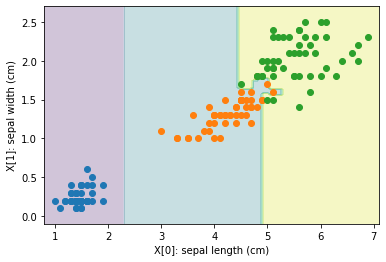

In [23]:
from collections import Counter
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.base import BaseEstimator, ClassifierMixin

def maisFrequente(y):
  return Counter(y.flat).most_common(1)[0][0]

class Arvore(BaseEstimator,ClassifierMixin):
  def fit(self,X,y):
    self.caracteristica,self.valor =  melhorCaracteristica(X,y)
    maiores = X[:,self.caracteristica] > self.valor
    if sum(maiores)>0 and sum(~maiores)>0:
      self.maiores = Arvore()
      self.maiores.fit(X[maiores,:],y[maiores])
      self.menores = Arvore()
      self.menores.fit(X[~maiores,:], y[~maiores])
    else:
      self.resposta = maisFrequente(y)    
  def predict(self,X):
    y = np.empty((X.shape[0]))
    if hasattr(self,'resposta'):
      y[:] = self.resposta
    else:
      maiores = X[:,self.caracteristica] > self.valor
      y[maiores] = self.maiores.predict(X[maiores,:])
      y[~maiores] = self.menores.predict(X[~maiores,:])
    return y
  
modelo = Arvore()
modelo.fit(X,y)
ypred = modelo.predict(X)

plotDecisao(modelo, X, y)

In [24]:
print("Accuracy: ", accuracy_score(y, ypred))

Accuracy:  0.9933333333333333


A heuristica escolhida obteve 99,3% de acurácia.. o resultado pode ser visualizado no gráfico acima. sendo quase imperceptivel o erro que não deixou ser 100%. Tendo em vista que a heurística do vídeo obteve acuária de 95%, acredito que essa abordagem foi um pouco melhor... porém pode ser apenas uma coincidência... tendo em vista que levar em conta fatores como impureza e outras caracteristicas podem ser mais genéricos, para conseguir melhores resultados em outras bases de dados.

Também faça comparações usando validação cruzada com pelo menos 3 bases de classificação com atributos contínuos.

Base 1 - Haberman Cancer Survival data set
Link do dataset   https://www.kaggle.com/krpiku/haberman.csv
Description: The data set contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

In [25]:
import pandas as pd
data_01 = pd.read_csv("https://raw.githubusercontent.com/lopeslopesedu/padroes/main/haberman.csv",sep =",")

data_01.shape

(305, 4)

In [26]:
data_01 = np.array(data_01)

In [27]:
X, y = data_01[0:, 0:-1], data_01[:, -1]
X.shape, y.shape

((305, 3), (305,))

In [28]:
from sklearn.model_selection import cross_validate
scores = cross_validate(modelo, X, y)
scores['test_score'], np.mean(scores['test_score'])

(array([0.72131148, 0.47540984, 0.70491803, 0.68852459, 0.6557377 ]),
 0.6491803278688524)

Base 2 - Health care: Data set on Heart attack possibility
https://www.kaggle.com/nareshbhat/health-care-data-set-on-heart-attack-possibility
About data set
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date.The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no/less chance of heart attack and 1 = more chance of heart attack

In [11]:
data_02 = pd.read_csv("https://raw.githubusercontent.com/lopeslopesedu/padroes/main/heart2.csv",sep =",")

data_02.shape

(302, 14)

In [12]:
data_02 = np.array(data_02)

In [13]:
X, y = data_02[0:, 0:-1], data_02[:, -1]
X.shape, y.shape

((302, 13), (302,))

In [14]:
scores = cross_validate(modelo, X, y)
scores['test_score'], np.mean(scores['test_score'])

(array([0.6557377 , 0.49180328, 0.58333333, 0.56666667, 0.58333333]),
 0.5761748633879782)

Base 3 - Pima Indians Diabetes Database
https://www.kaggle.com/uciml/pima-indians-diabetes-database
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

In [15]:
data_03 = pd.read_csv("https://raw.githubusercontent.com/lopeslopesedu/padroes/main/diabetes.csv",sep =",")

data_03.shape

(768, 9)

In [16]:
data_03 = np.array(data_03)

In [17]:
X, y = data_03[0:, 0:-1], data_03[:, -1]
X.shape, y.shape

((768, 8), (768,))

In [18]:
scores = cross_validate(modelo, X, y)
scores['test_score'], np.mean(scores['test_score'])

(array([0.62987013, 0.68831169, 0.72077922, 0.7124183 , 0.69934641]),
 0.6901451489686785)

Escreva um parágrafo expondo sua interpretação dos resultados obtidos:

Levando em conta os resultados obtidos pelas bases:

1.   Base 1 : 64%
2.   Base 2 : 57%
3.   Base 3 : 69%

Acredito que o resultado possa está correlacionado ao comportamento das amostras.. como a abordagem utilizada foi utilizar a caracteristica com maior desvio padrão... sem ter feito nenhum tratamento especifico no conjunto de dados, isso pode ter influenciado diretamente os resultados obtidos. A base 2 era a que continha mais caracteristicas e mesmo assim foi a que obteve o pior resultado, pois provalmente nessa abordagem a caracteristica escolhida pode ser uma que não influencia tanto como as outras.





